In [1]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Supressing warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading data and checking the dataset

In [4]:
#loading data to dataframe
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
## checking the dataset shape
leads.shape

(9240, 37)

> Note :  There are 9240 rows and 37 columnsin the given dataset

In [7]:
## checking the datatypes present and null values in dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

> Note : Most of the columns are object dtype. There are alot of cols which has missing vlues and we need to treat it.

In [9]:
# Checking the dataset summary
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning and Data preparation / Imputation

In [11]:
## Checking the missing values present in each column of the dataset
round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
## Checking categorical columns
for i in leads:
    print(leads[i].astype('category').value_counts(normalize= True))
    print('-'*50)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.000108
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    0.000108
aa27a0af-eeab-4007-a770-fa8a93fa53c8    0.000108
aa30ebb2-8476-41ce-9258-37cc025110d3    0.000108
aa405742-17ac-4c65-b19e-ab91c241cc53    0.000108
                                          ...   
539eb309-df36-4a89-ac58-6d3651393910    0.000108
539ffa32-1be7-4fe1-b04c-faf1bab763cf    0.000108
53aabd84-5dcc-4299-bbe3-62f3764b07b1    0.000108
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    0.000108
fffb0e5e-9f92-4017-9f42-781a69da4154    0.000108
Name: proportion, Length: 9240, dtype: float64
--------------------------------------------------
Lead Number
579533    0.000108
629593    0.000108
630390    0.000108
630403    0.000108
630405    0.000108
            ...   
602534    0.000108
602540    0.000108
602557    0.000108
602561    0.000108
660737    0.000108
Name: proportion, Length: 9240, dtype: float64
--------------------------------------------------
Lead Origin
Landing Page Submiss

#### Looking at the data, The Following measures to  be taken

> Drop the columns with more than 45% missing values.

> The following categorical columns has level "Select" which needs to be handled.Since they are default values( customer non selected) we **cannot impute them** hence to be treated as **Not Specified**.

* How did you hear about X Education
* Lead Profile
* Specialization
* City

> Columns having Yes/No options which needs to be looked into. The following columns have only one level, hence can be deleted as they do not provide insights.

* Do Not Call
* Search
* Magazine
* Newspaper
* X Education Forums
* Through Recommendations
* Receive More Updates About Our Courses
* Update me on Supply Chain Content
* Get updates on DM Content
* I agree to pay the amount through cheque
* Digital Advertisement
* Newspaper Article

> These are columns which can be encoded to 0/1

* Do Not Email
* A free copy of Mastering The Interview


In [14]:
## Changing level "Select" as "Not Specified"
leads = leads.replace ("Select", "Not Specified")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Not Specified,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Not Specified,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


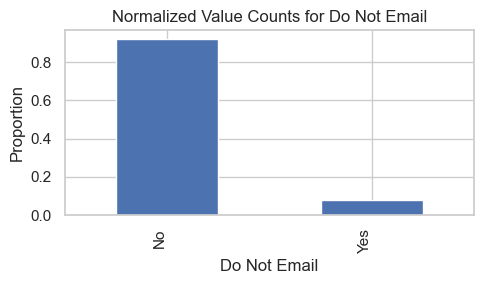

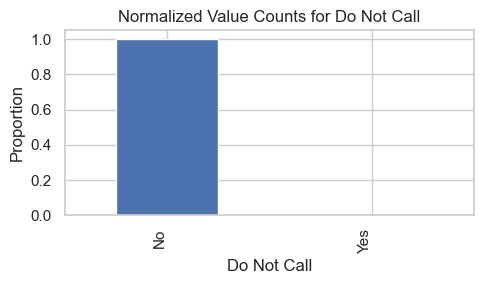

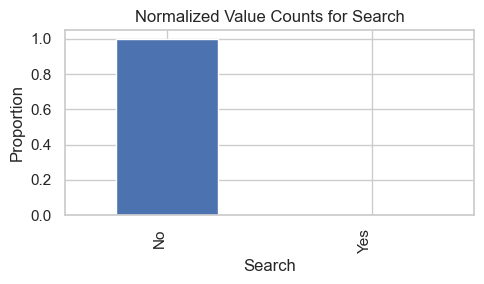

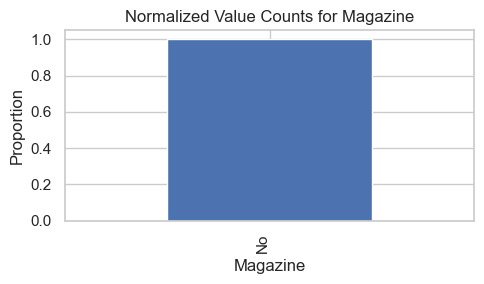

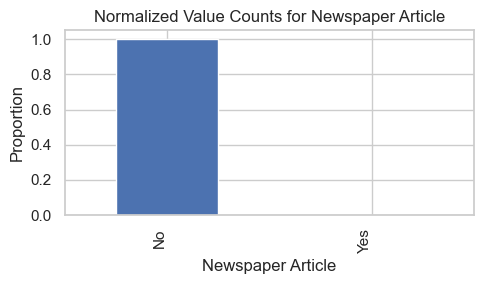

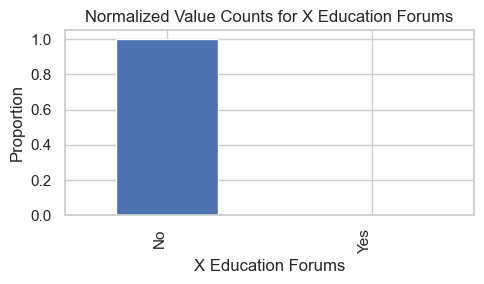

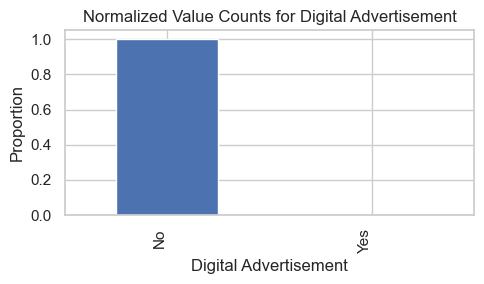

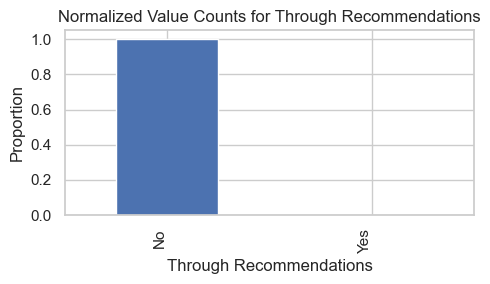

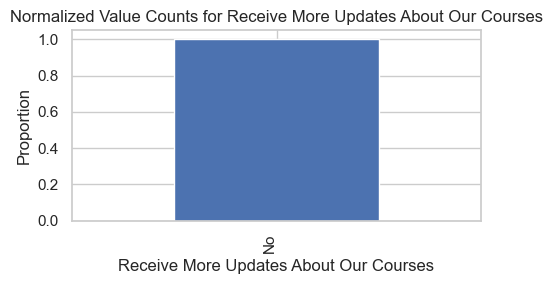

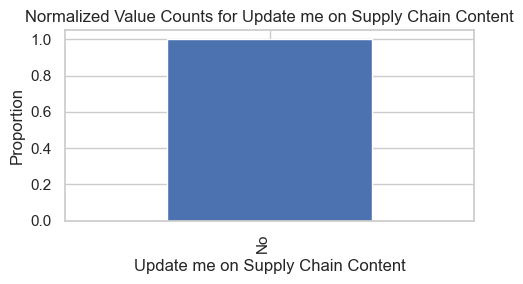

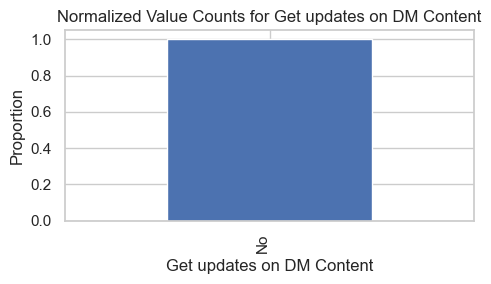

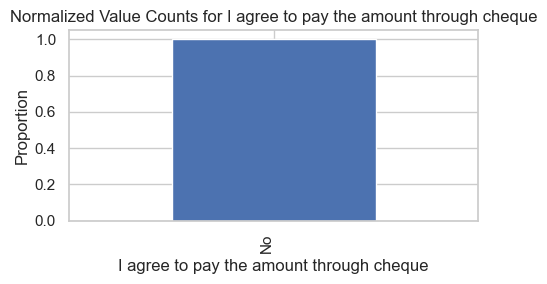

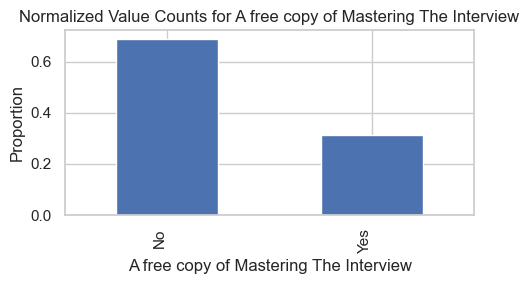

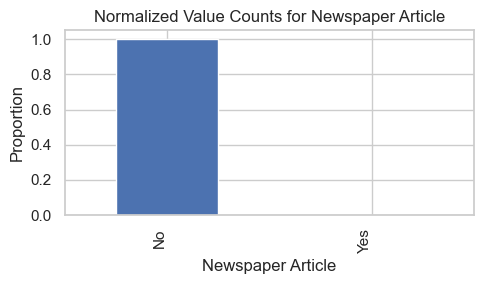

In [15]:
## Plotting features with Yes/ No levels
features = ["Do Not Email","Do Not Call", "Search","Magazine","Newspaper Article","X Education Forums",
            "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
            "Update me on Supply Chain Content","Get updates on DM Content",
            "I agree to pay the amount through cheque","A free copy of Mastering The Interview",'Newspaper Article']

for feature in features:
    plt.figure(figsize=(5, 3))  
    leads[feature].value_counts(normalize=True).plot(kind="bar")
    plt.title(f"Normalized Value Counts for {feature}")
    plt.ylabel("Proportion")  
    plt.xlabel(feature)  
    plt.xticks(rotation=90, ha='right') 
    plt.tight_layout() 
    plt.show() 

We can see that except for columns - Do Not Email & A free copy of Mastering The Interview most of the columns have only 1 level hence these can be dropped.

In [17]:
## Dropping the columns
leads = leads.drop(["Do Not Call", "Search","Magazine","Newspaper","X Education Forums",
                    "Digital Advertisement","Through Recommendations",
                    "Receive More Updates About Our Courses","Update me on Supply Chain Content",
                    "Get updates on DM Content","I agree to pay the amount through cheque",
                    "Newspaper Article"],axis=1,)

In [18]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [19]:
## Encoding columns with Yes/No levels
for feature in ["Do Not Email","A free copy of Mastering The Interview"]:
    leads[feature] = leads[feature].apply(lambda x: 1 if x=="Yes" else 0)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Not Specified,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Not Specified,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [20]:
## Checking the dataframe for Null values
round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)),2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Prospect I

In [21]:
## Dropping columns where missing value >45%
cols=leads.columns
for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, axis=1, inplace = True)

#### Checking into the rest of the columns which have a higher null values and Imputing the NaN values

* Tags                                             36.29%
* What matters most to you in choosing a course    29.32%
* Lead Profile                                     29.32%
* What is your current occupation                  29.11%
* Country                                          26.63%
* How did you hear about X Education               23.89%
* Specialization                                   15.56%
* City                                             15.37%

In [23]:
leads["Tags"].value_counts(dropna =False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [24]:
# We can replace Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [25]:
leads['What matters most to you in choosing a course'].value_counts(dropna =False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [26]:
## We can impute the NaN values as " Not Specified"
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Not Specified')

In [27]:
leads["Lead Profile"].value_counts(dropna = False)

Lead Profile
Not Specified                  4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

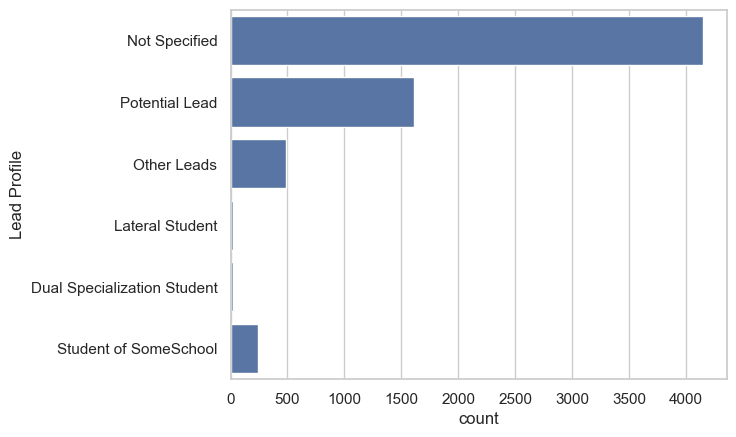

In [28]:
sns.countplot(leads["Lead Profile"])
plt.show()

In [29]:
## Not Specified and NaN constitute for 75% of the datapoints in this columns, this column can be dropped as it wont lead to meaningful insights
leads =  leads.drop("Lead Profile",axis=1)

In [30]:
leads["What is your current occupation"].value_counts(dropna = False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

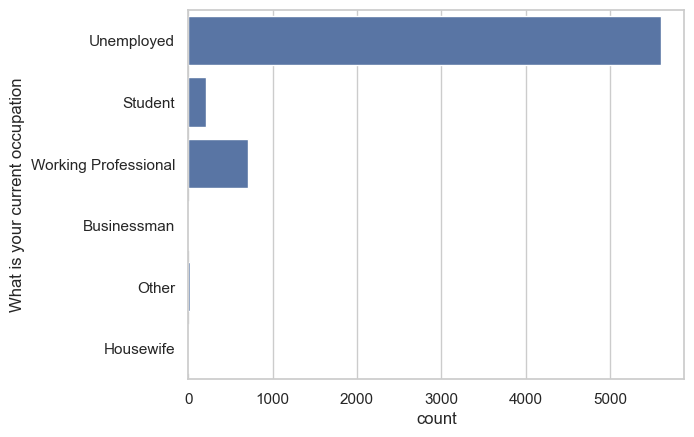

In [31]:
sns.countplot(leads["What is your current occupation"])
plt.show()

In [32]:
## We can impute the NaN values as "Not Specified"
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.NaN,"Not Specified")

In [33]:
leads["City"].value_counts(dropna= False)

City
Mumbai                         3222
Not Specified                  2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [34]:
## 40% of the data fall under Not Specified and NaN catergory and rest 35% belongs to Mumbai hence dropping this column.
leads = leads.drop("City", axis=1)

In [35]:
leads["Specialization"].value_counts(dropna=False)

Specialization
Not Specified                        1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

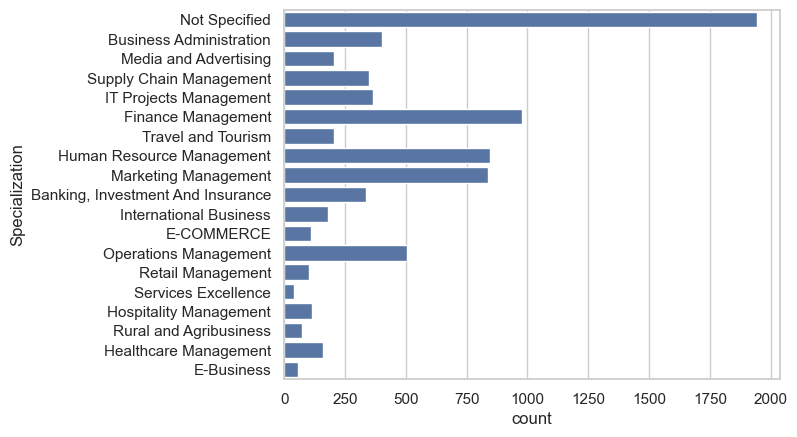

In [36]:
sns.countplot(leads["Specialization"])
plt.show()

In [37]:
## Either the prospective client might not have a specialisation or the specialisation is not available in the drop down menu hence we can impute them as Not Specified
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [38]:
leads["Country"].value_counts(dropna= False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [39]:
## 70% of Data belongs to "India", rest 30% data is Missing hence since majority data is that of India there is no additional insights from this column hence we can drop it.
leads.drop("Country", axis=1, inplace=True)

In [40]:
## Re-Checking the dataframe for Null values
round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)),2)

How did you hear about X Education               23.89
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Specialization                                    0.00
A free copy of Mastering The Interview            0.00
Tags                                              0.00
What matters most to you in choosing a course     0.00
What is your current occupation                   0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: float64

## Step 3: Exploratory Data Analysis

In [42]:
## Let's look into the main target variable "Converted"
leads["Converted"].value_counts(normalize=True)

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64

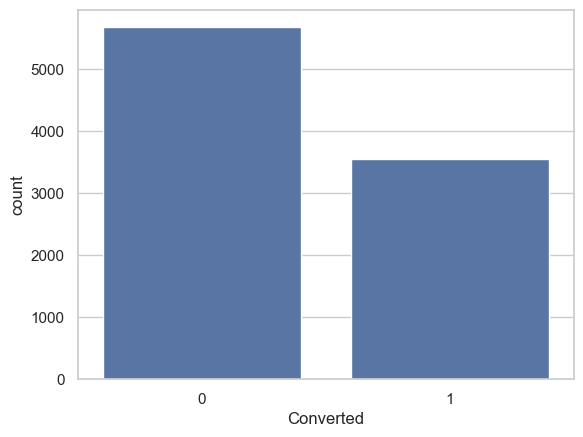

In [43]:
sns.countplot(x=leads["Converted"])
plt.show()

We can see that there is 60%( not converted) and 40%( converted) split in data , hence we can assume that there is no Imbalance in data

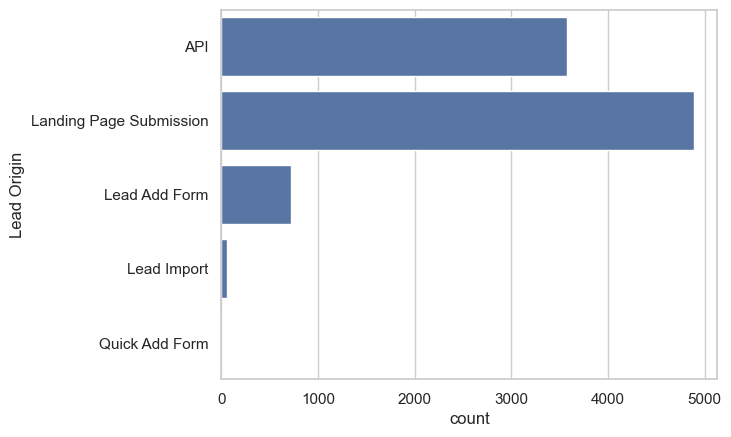

In [45]:
sns.countplot(leads["Lead Origin"])
plt.show()

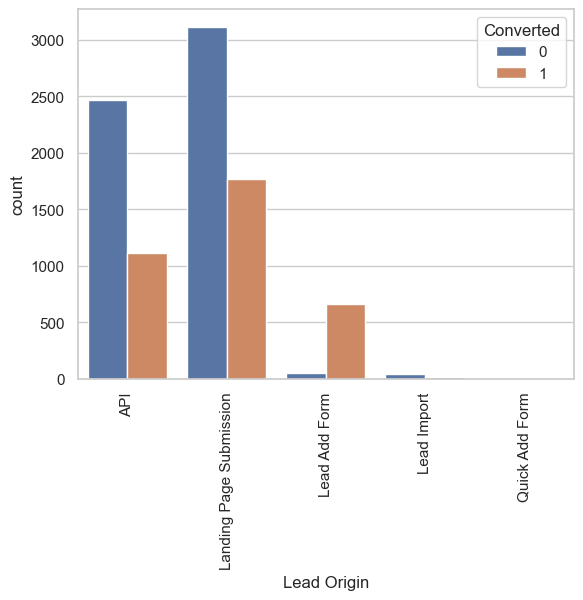

<Figure size 1000x800 with 0 Axes>

In [46]:
sns.countplot(data=leads, x= 'Lead Origin', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

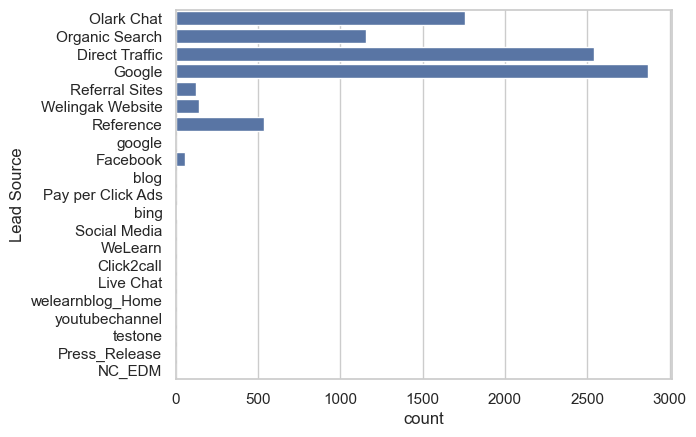

In [47]:
sns.countplot(leads["Lead Source"])
plt.show()

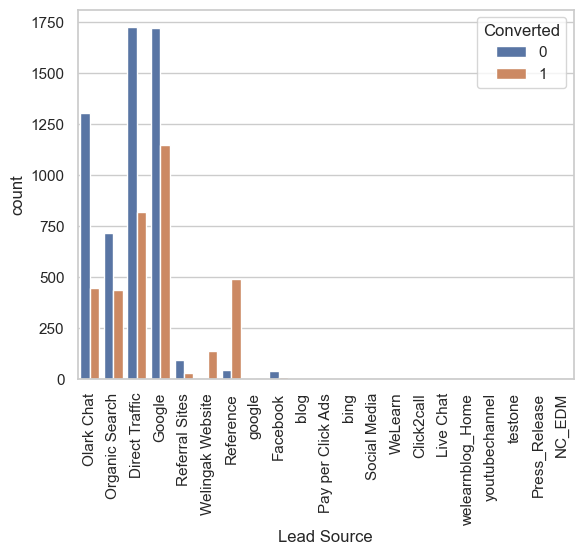

<Figure size 1000x800 with 0 Axes>

In [48]:
sns.countplot(data=leads, x= 'Lead Source', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

#### Observations

* API and Landing page submissions generate large counts of leads however the conversion rates are really low.4
* Lead Add form generates lower counts of leads however the conversion rates are high.
* Lead import is not very important has the number of leadsgenerated and that being converted are really low.

**To impove the lead conversion from lead origins we need to increase lead generated from API and Landing page submissions and increase the lead generated from Lead Add form as conversions are good.**

* When we see Lead Source, Blog,Pay per Click Ads, bing, Social Media,WeLearn,Click2call,LiveChat,welearnblog_Home,youtubechannel,testone,Press_release,NC_EDM dont provide any insight.
* The lead counts from Direct Traffic, Google gererates maximum number of leads.'

* Reference shows highest conversion rate. 

**Reference is a mode of getting good leads. Incentive existing students for referning their friends is a  good method to boast the leads via Reference hence increase lead conversion.**

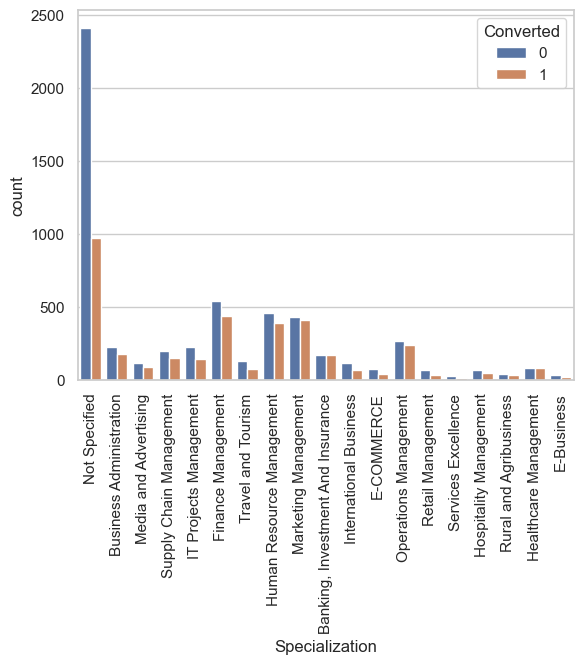

<Figure size 1000x800 with 0 Axes>

In [50]:
sns.countplot(data=leads, x= 'Specialization', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

### Observation

* Clients from Management specialisation ( Finance, HR, Marketing, Business Administration, Operations) are potential leads with higher conversion rate.
* There is a lot of Not specified category to identify and categorise and target customers better, its good to make Specialization a madatoy option to choose incase we havent an option for Client's specialisation we can add an option of Other and customer can manually enterhis/ her specialisation.

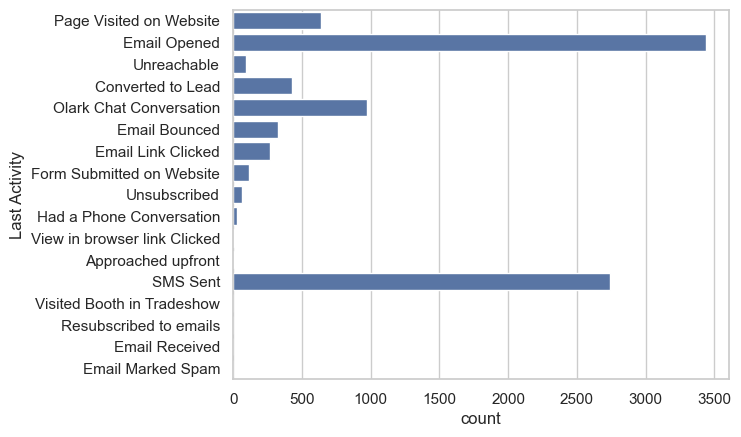

In [52]:
sns.countplot(leads["Last Activity"])
plt.show()

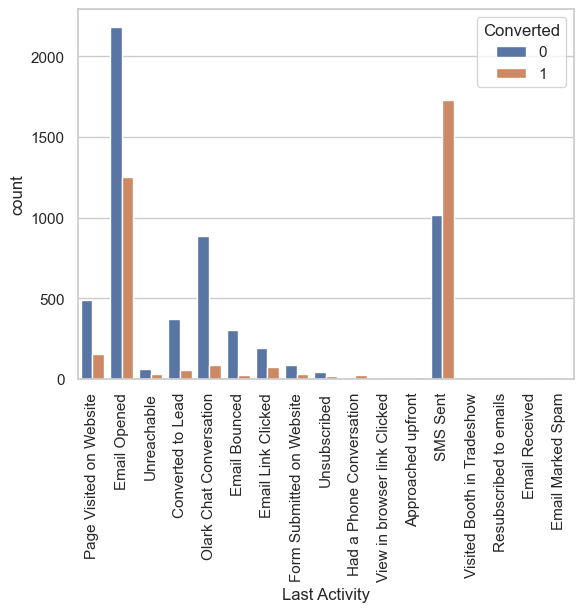

<Figure size 1000x800 with 0 Axes>

In [53]:
sns.countplot(data=leads, x= 'Last Activity', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

### Observation

* Maximum count is for the last activity - Email Opened and SMS sent.

* We can see that conversion for SMS sent as last activity is very high. 

**We should focus on increasing conversion rate of clients who has Email Opened  as  last activity. We can sent a follow up call or SMS to increase the engagement.**

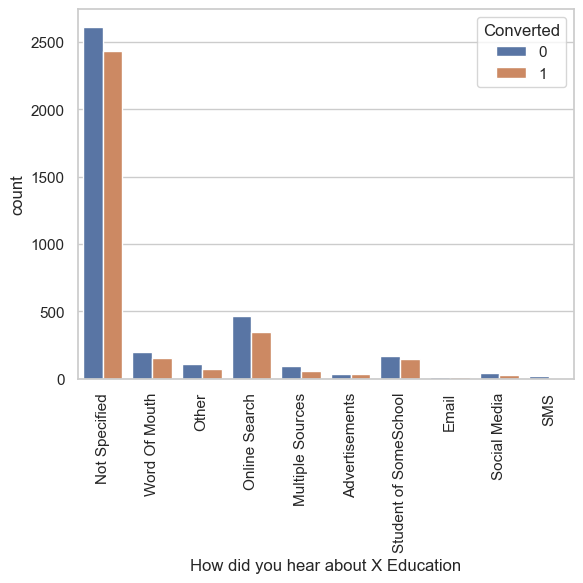

<Figure size 1000x800 with 0 Axes>

In [55]:
sns.countplot(data=leads, x= 'How did you hear about X Education', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

### Observation

* Not Specified is maximum count , we are unable to get any insights about how clients heard about X Education hence this can be dropped.
* **We need to  make this field as mandatory for better insights about how clients hear about our platform**.


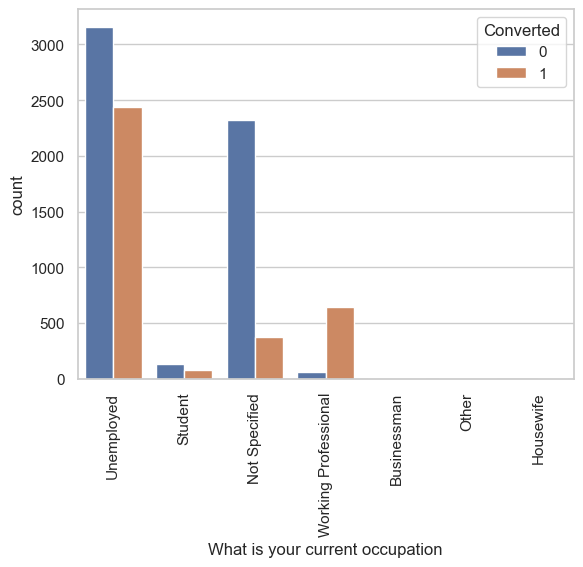

<Figure size 1000x800 with 0 Axes>

In [57]:
sns.countplot(data=leads, x= 'What is your current occupation', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

### Observations

* Most of the leads belong to the Unemployed category , however the conversation rate is not very high.

* Conversion in working professional category is high.

**Special promotions can be done to attract more working professionals via LinkedIn or have some special offers for company HR portal to have more number of leads**.

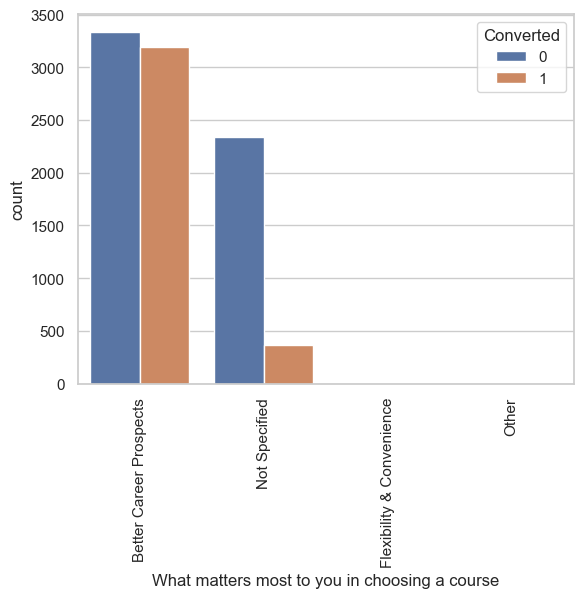

<Figure size 1000x800 with 0 Axes>

In [59]:
sns.countplot(data=leads, x= 'What matters most to you in choosing a course', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

* This is generic , people choose online courses generally to upgrade themselves and get better career options. We can drop the column as there is no specific insight provided by this column.

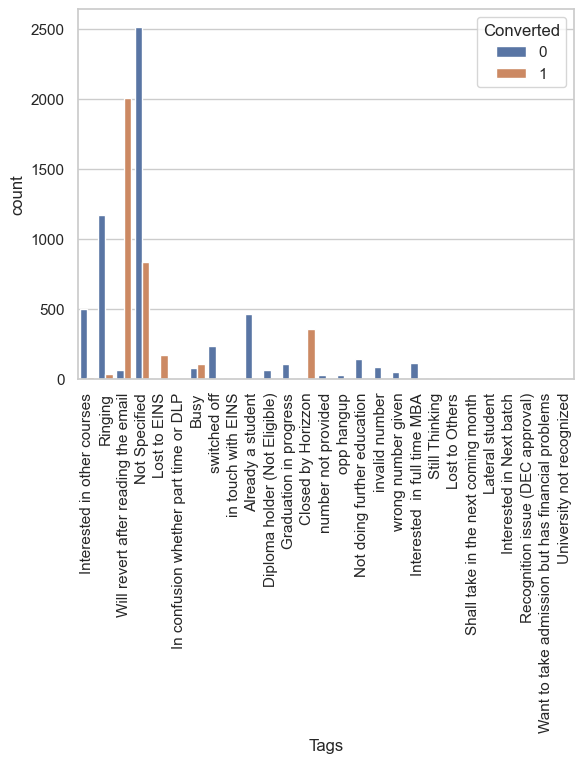

<Figure size 1000x800 with 0 Axes>

In [61]:
sns.countplot(data=leads, x= 'Tags', hue='Converted')
plt.xticks(rotation =90)
plt.figure(figsize=(10,8))

plt.show()

### Observation

* Will revert after raeding the email and Closed b Horizzon have highest conversion rates.

### Visualisation of Numerical columns

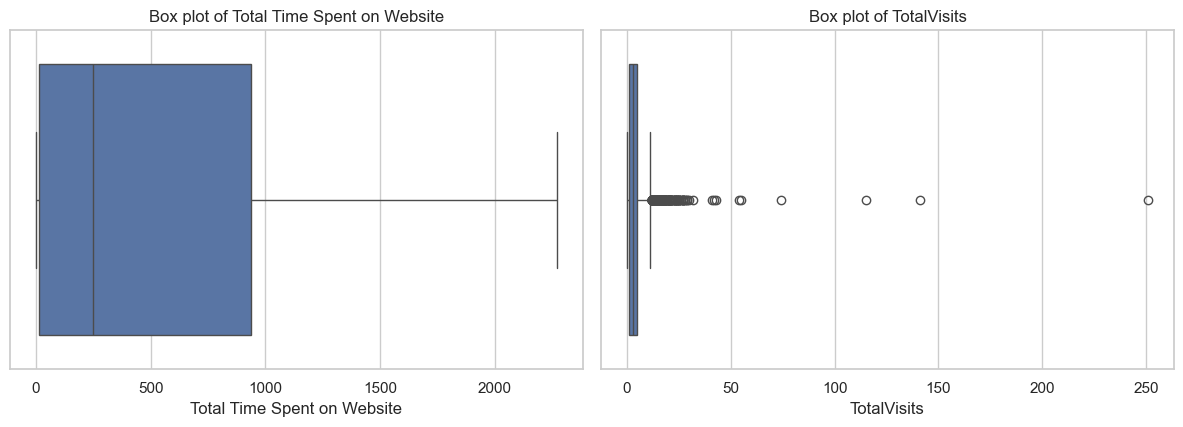

In [64]:
features = ["Total Time Spent on Website", "TotalVisits"]

plt.figure(figsize=(12, 8))  
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(data=leads, x=feature)  
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

There are a lot of outliers in TotalVisits hence we need to cap it at 99 percentile  

In [66]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

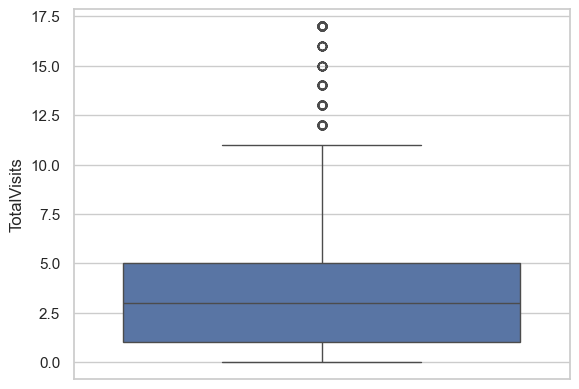

In [67]:
#capping the outliers at 99 percentile
u_limit=leads.TotalVisits.quantile(0.99)
leads.TotalVisits=leads.TotalVisits.clip(upper=u_limit)
sns.boxplot(y=leads['TotalVisits'])
plt.show()

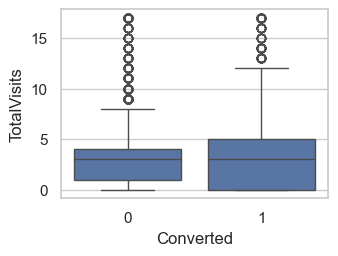

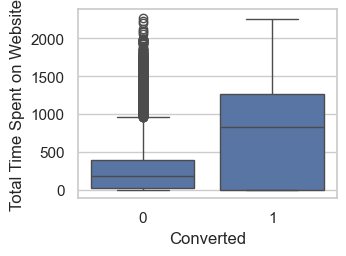

In [68]:
for i, feature  in enumerate (["TotalVisits","Total Time Spent on Website"]):
    plt.subplot(2,2,i+1)
    sns.boxplot(data= leads, x="Converted", y=feature)
    plt.tight_layout()
    plt.show()

### Observation

* There are no specific observation in TotalVisits as the median for conversion and non -conversion is ther same.
* There is  a  significant relationship between conversion and Total time spent on website.

**Makng website interaction more engaging so that customer spends more time on the website will lead to a significant increase in lead conversion.**

In [70]:
## Dropping additional columns
leads =leads.drop(["Prospect ID","Lead Number","What matters most to you in choosing a course", "How did you hear about X Education"],axis=1)

## As Prospect ID and Lead Number are unique to a particular customer  we can drop them before modelling.

In [71]:
## Finally checking the columns in the dataframe.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

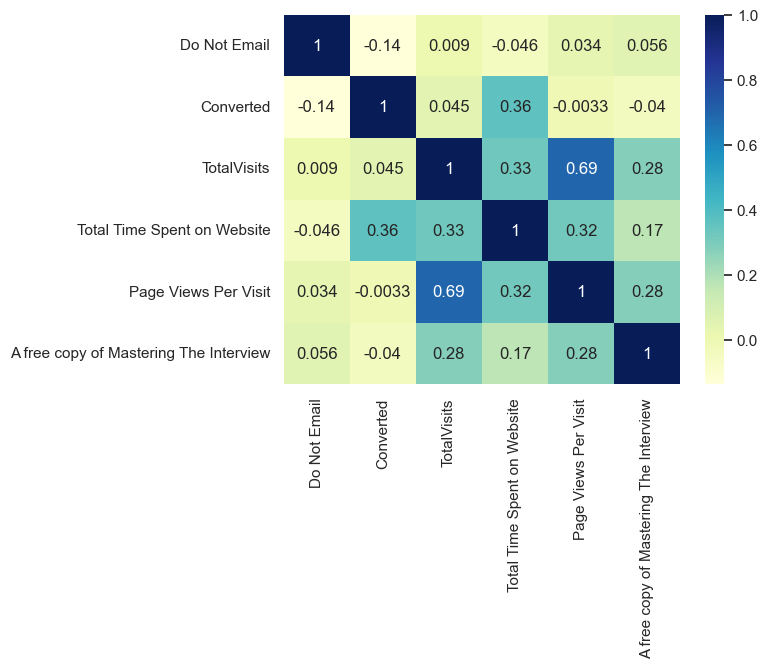

In [72]:
sns.heatmap(leads.select_dtypes(include='number').corr(), cmap="YlGnBu", annot=True)
plt.show()

In [73]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


### Observation

* Page Veiw per visits and TotalVisits are highly correlated.

In [75]:
round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)),2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

Now we can still see Lead Source, TotalVisits, Page Views Per Visit and Last Activity have missing vlaues, which is small percentage. This can be fixed by imputing the categorical columns with mode and numerical columns with median.

In [77]:
#imputing the missing values in TotalVisits with the median of the column
leads['TotalVisits'].fillna(leads['TotalVisits'].median(),inplace=True)

In [78]:
#imputing the missing values in Page Views Per Visit column with the median
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [79]:
#imputing the missing values in 'Lead Source' with mode of the column

leads['Last Activity'].fillna(leads['Last Activity'].mode()[0],inplace=True)

In [80]:
#imputing the missing values in 'Lead Source' with mode of the column

leads['Lead Source'].fillna(leads['Lead Source'].mode()[0],inplace=True)

In [81]:
round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [82]:
## Checking all the categorical variables
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [83]:
leads.shape

(9240, 13)

In [84]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Dummy variable creation for categorical variables and dropping the first column

In [86]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
        'Tags', 'Last Notable Activity']],drop_first=True,dtype=int)
leads = pd.concat([leads,dummy],axis=1)

In [87]:
leads.shape

(9240, 94)

In [88]:
#for other categorical columns we have dropped the first dummy variable using drop_first.
#wheras in the case of Specialization and What is your current occupation, we have one category called Not Specified.
#We will remove this column using the below code.
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization',dtype=int)
dummy = dummy.drop(['Specialization_Not Specified'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)
dummy = pd.get_dummies(leads["What is your current occupation"], prefix  = 'Occupation',dtype=int)
dummy = dummy.drop(['Occupation_Not Specified'], axis=1) 
leads = pd.concat([leads, dummy], axis = 1)

In [89]:
## Dropping the original columns
leads.drop(cat_cols,axis=1,inplace = True)

In [90]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting Data into Train & Test sets

In [92]:
## y is the target variable
y = leads['Converted']

##  X has all the variableexcept for the target variable
X=leads.drop('Converted', axis=1)

In [93]:
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size  =0.7,test_size= 0.3,random_state =140)

In [94]:
#Shapes of train and test sets
print('X_train shpae:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shpae: (6468, 110)
y_train shape: (6468,)
X_test shape: (2772, 110)
y_test shape: (2772,)


### Scaling of Numeric Columns

We have 'Total Visits','Total Time Spent on Website','Page Views Per Visit' as numeric columns. We need to scale these columns

In [97]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(
    X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
41,1,0.411765,0.016725,0.127273,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5655,0,0.058824,0.218310,0.018182,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3100,0,0.117647,0.117958,0.036364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7978,0,0.411765,0.434419,0.021273,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2389,0,0.176471,0.599472,0.054545,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
# Scaling the test set
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(
    X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [99]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
6515,1,0.058824,0.030370,0.018182,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
9117,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1664,0,0.117647,0.139085,0.036364,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9131,0,0.117647,0.237236,0.036364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3600,0,0.352941,0.037412,0.021818,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Correlation between Variables

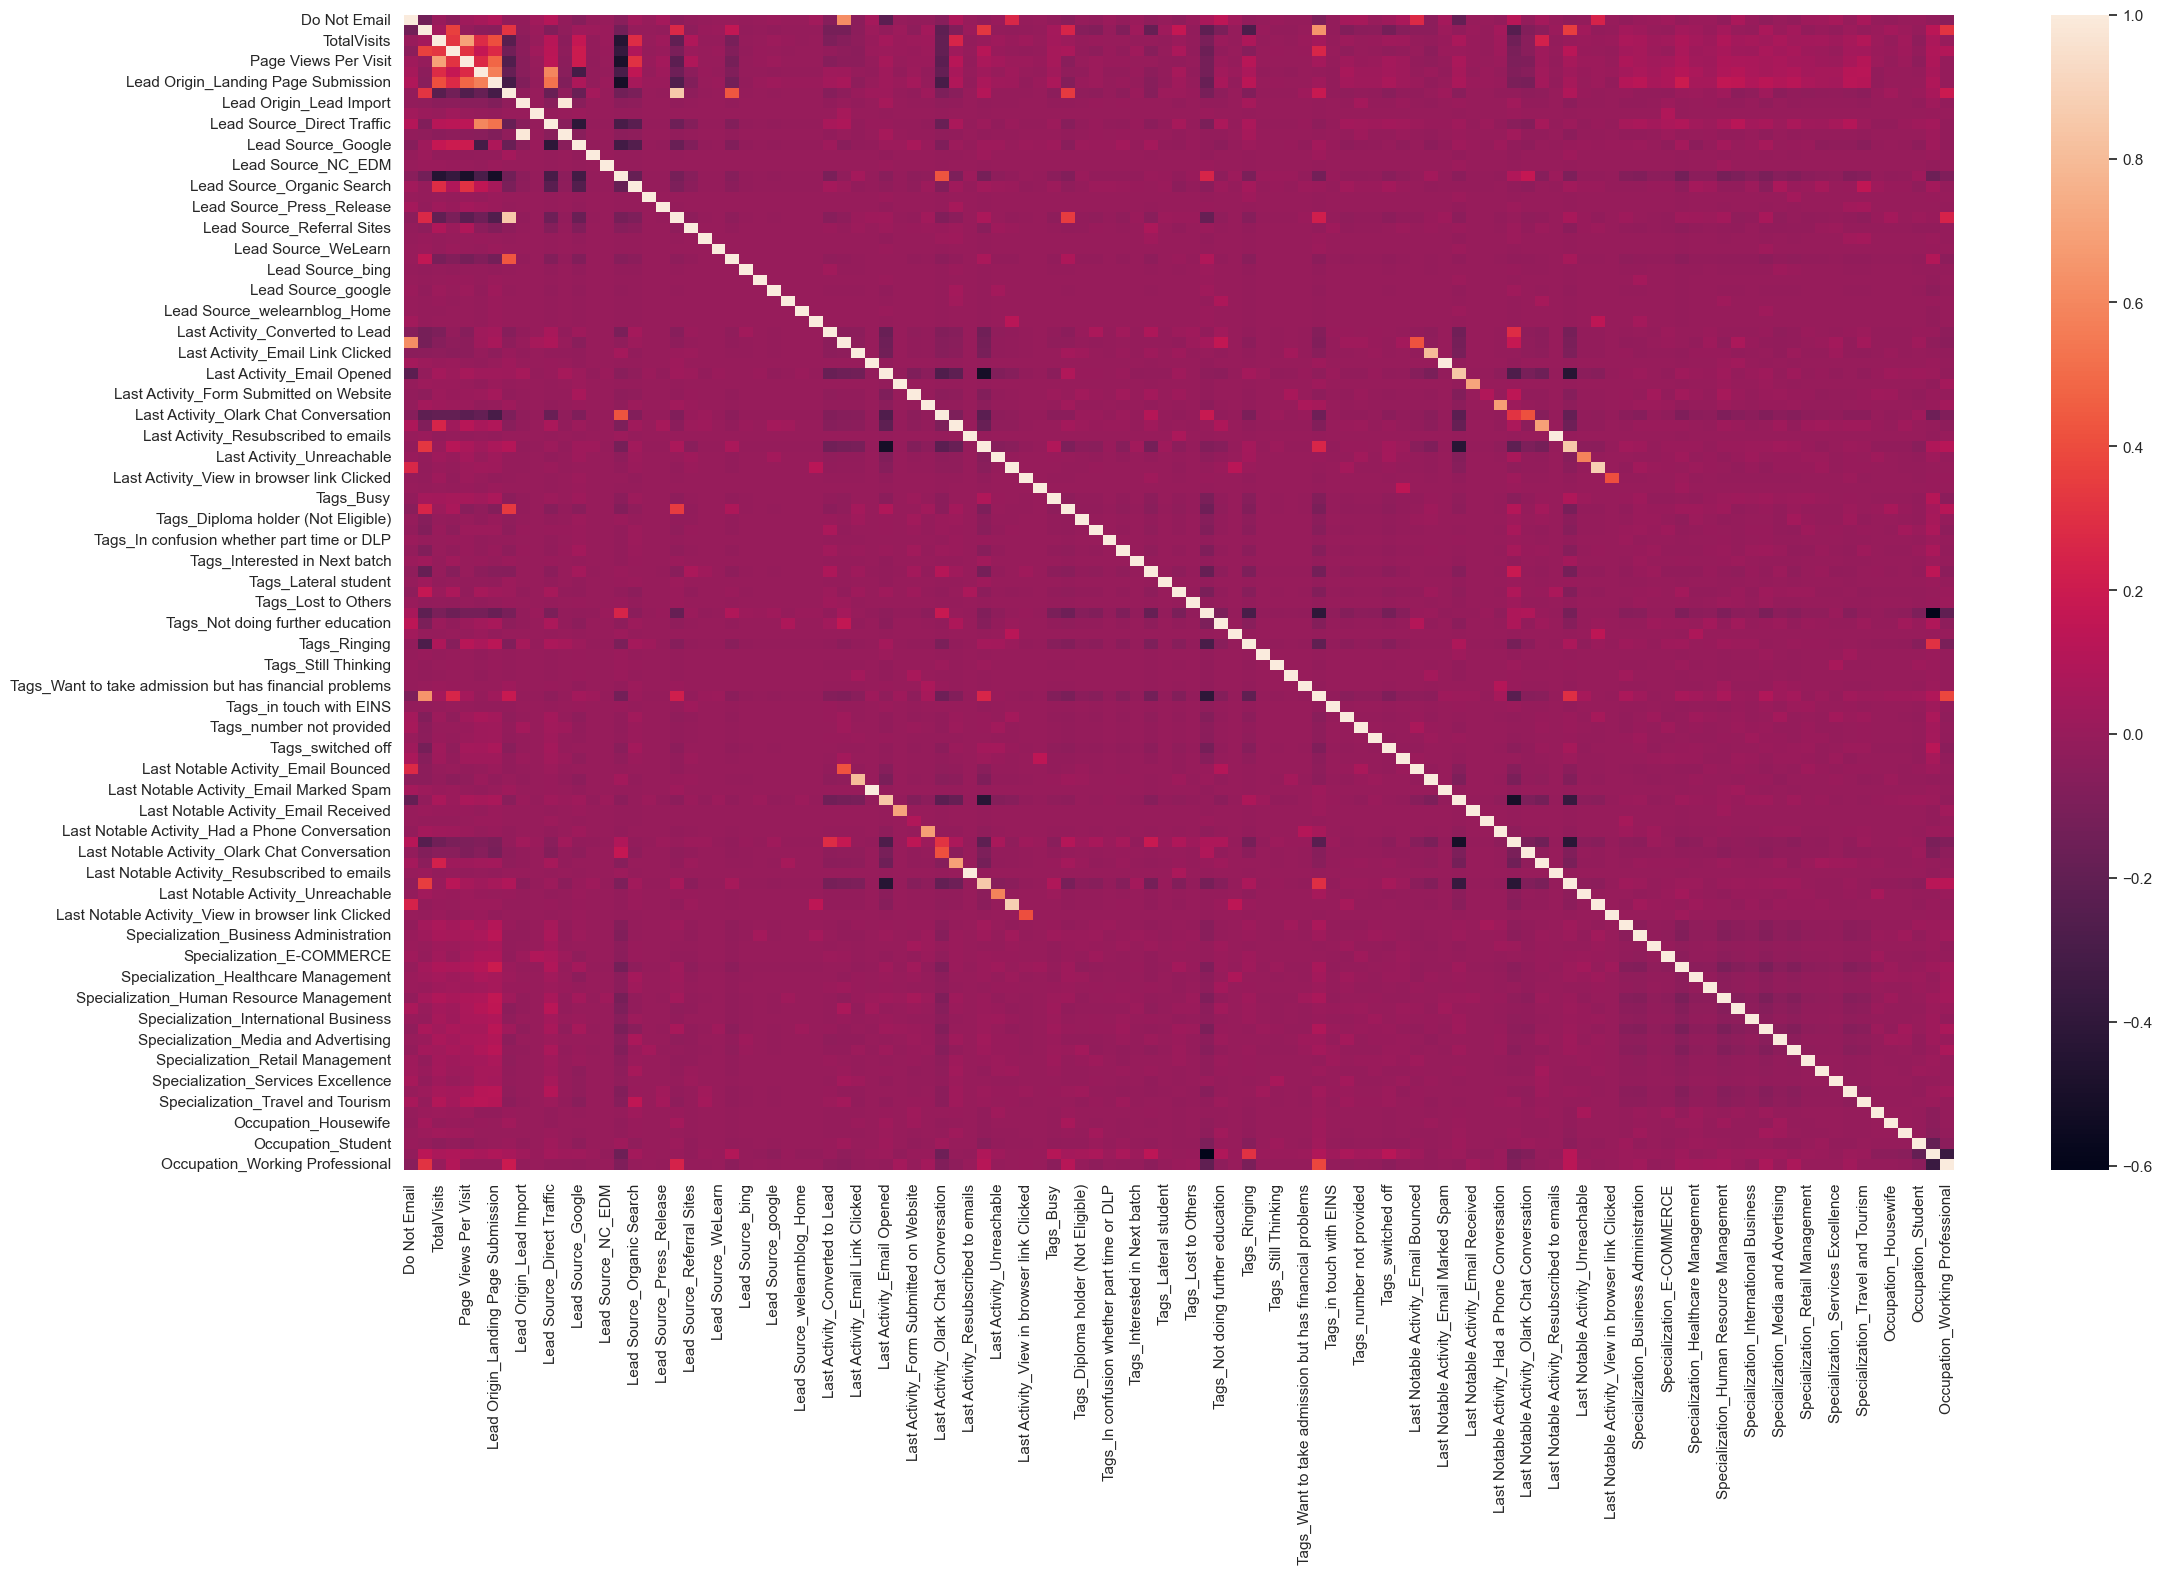

In [101]:
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

From the above heat map we do see that some variables are highly correlated with one another. We need to eliminate those variables during our model building

### Model Building

As we are having so many variables in the dataset, we cannot deal with these many variables during our model building. So, we will select a few best suitable variables for our model using the RFE method

In [105]:
#creating a LogisticRegression object
logreg = LogisticRegression()

In [106]:
#using RFE lets select the 15 best variables
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [107]:
#list of features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 46),
 ('A free copy of Mastering The Interview', False, 60),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 59),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 90),
 ('Lead Source_NC_EDM', False, 36),
 ('Lead Source_Olark Chat', False, 40),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 89),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 25),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 94),
 ('Lead Source_WeLearn', False, 88),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 78),
 ('Lead Source_blo

In [108]:
#15 selected columns by RFE
select_cols= X_train.columns[rfe.support_]

In [109]:
#using only these selected 15 columns in our training model
X_train = X_train[select_cols]

Now that we have the selected columns by rFE, lets start model building and fine tune the model using p-values and VIFs

#### Model 1

In [112]:
#Fit the Logistic Regression model after adding constant
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1211.0
Date:                Tue, 19 Nov 2024   Deviance:                       2421.9
Time:                        20:56:54   Pearson chi2:                 8.16e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6163
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -7.3651      0.267    -27.628      0.000      -7.888      -6.843
Total Time Spent on Website                  3.7764      0.228     16.586      0.000       3.330       4.223
Lead Source_Welingak Website                 4.1399      1.021      4.056      0.000       2.140       6.140
Last Activity_SMS Sent                       2.0548      0.119     17.226      0.000       1.821       2.289
Tags_Busy                                    2.7101      0.297      9.134      0.000       2.129       3.292
Tags_Closed by Horizzon                      9.6615      1.035      9.332      0.000       7.632      11.691
Tags_Lost to EINS                            8.6818      0.653     13.290      0.000       7.401       9.962
Tags_Not Specified                           3.9079      0.227     17.228      0.000       3.463       4.353
Tags_Ringing                                -1.2288      0.310     -3.961      0.000      -1.837      -0.621
Tags_Will revert after reading the email     6.6591      0.257     25.937      0.000       6.156       7.162
Tags_invalid number                         -1.5775      1.116     -1.414      0.157      -3.765       0.610
Tags_switched off                           -1.2577      0.560     -2.246      0.025      -2.355      -0.160
Tags_wrong number given                    -20.8085   1.25e+04     -0.002      0.999   -2.45e+04    2.44e+04
Occupation_Student                           2.0801      0.421      4.939      0.000       1.255       2.905
Occupation_Unemployed                        2.6207      0.143     18.331      0.000       2.340       2.901
Occupation_Working Professional              2.8503      0.342      8.333      0.000       2.180       3.521
============================================================================================================
"""

In [113]:
#Checking VIF scores
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Occupation_Unemployed,3.04
8,Tags_Will revert after reading the email,2.56
0,Total Time Spent on Website,2.01
7,Tags_Ringing,1.66
2,Last Activity_SMS Sent,1.63
14,Occupation_Working Professional,1.60
6,Tags_Not Specified,1.31
4,Tags_Closed by Horizzon,1.23
10,Tags_switched off,1.14
3,Tags_Busy,1.12


Typically, VIF values greater than 5 (and especially greater than 10) indicate high multicollinearity that needs to be addressed. In this case, the highest VIF score is <b>3.04 (for Occupation_Unemployed)</b>, which is well below the threshold.

Since multicollinearity is not an issue, lets focus on removing the insignificant features
As seen in the regression summary, the feature <b>'Tags_wrong number given</b>' (p-value = <b>0.999</b>)
This can be removed because this is not statistically significant.

In [116]:
X_train.drop('Tags_wrong number given',axis=1,inplace=True)

#### Model 2

In [118]:
#fitting the model with one feature eliminated
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1213.2
Date:                Tue, 19 Nov 2024   Deviance:                       2426.3
Time:                        20:56:55   Pearson chi2:                 8.16e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6161
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -7.4317      0.267    -27.820      0.000      -7.955      -6.908
Total Time Spent on Website                  3.7757      0.228     16.592      0.000       3.330       4.222
Lead Source_Welingak Website                 4.1402      1.020      4.057      0.000       2.140       6.140
Last Activity_SMS Sent                       2.0428      0.119     17.187      0.000       1.810       2.276
Tags_Busy                                    2.7876      0.296      9.419      0.000       2.208       3.368
Tags_Closed by Horizzon                      9.7293      1.035      9.397      0.000       7.700      11.759
Tags_Lost to EINS                            8.7494      0.653     13.391      0.000       7.469      10.030
Tags_Not Specified                           3.9806      0.227     17.557      0.000       3.536       4.425
Tags_Ringing                                -1.1488      0.309     -3.715      0.000      -1.755      -0.543
Tags_Will revert after reading the email     6.7286      0.257     26.184      0.000       6.225       7.232
Tags_invalid number                         -1.4969      1.115     -1.342      0.180      -3.683       0.689
Tags_switched off                           -1.1772      0.559     -2.105      0.035      -2.273      -0.081
Occupation_Student                           2.0860      0.423      4.936      0.000       1.258       2.914
Occupation_Unemployed                        2.6169      0.143     18.328      0.000       2.337       2.897
Occupation_Working Professional              2.8554      0.343      8.323      0.000       2.183       3.528
============================================================================================================
"""

In [119]:
#Checking VIF scores
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,2.98
8,Tags_Will revert after reading the email,2.53
0,Total Time Spent on Website,2.01
7,Tags_Ringing,1.64
2,Last Activity_SMS Sent,1.63
13,Occupation_Working Professional,1.60
6,Tags_Not Specified,1.31
4,Tags_Closed by Horizzon,1.23
10,Tags_switched off,1.14
3,Tags_Busy,1.12


The updated VIF scores show no signs of problematic multicollinearity. The highest VIF remains at <b>2.98</b>, which is far below the threshold of concern (usually VIF > 5 or 10). Here's what this means for your model and next steps:

<b>"Tags_invalid number"</b> has a p-value of <b>0.180</b>, indicating it is still insignificant and should be removed

In [122]:
X_train.drop('Tags_invalid number',axis=1,inplace=True)

#### Model 3

In [124]:
#fitting the model with one feature eliminated
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1214.5
Date:                Tue, 19 Nov 2024   Deviance:                       2428.9
Time:                        20:56:55   Pearson chi2:                 8.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6159
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -7.4998      0.266    -28.157      0.000      -8.022      -6.978
Total Time Spent on Website                  3.7732      0.228     16.582      0.000       3.327       4.219
Lead Source_Welingak Website                 4.1403      1.020      4.057      0.000       2.140       6.140
Last Activity_SMS Sent                       2.0298      0.118     17.148      0.000       1.798       2.262
Tags_Busy                                    2.8678      0.294      9.760      0.000       2.292       3.444
Tags_Closed by Horizzon                      9.7991      1.035      9.467      0.000       7.770      11.828
Tags_Lost to EINS                            8.8190      0.653     13.505      0.000       7.539      10.099
Tags_Not Specified                           4.0556      0.225     18.024      0.000       3.615       4.497
Tags_Ringing                                -1.0656      0.307     -3.472      0.001      -1.667      -0.464
Tags_Will revert after reading the email     6.8005      0.256     26.576      0.000       6.299       7.302
Tags_switched off                           -1.0936      0.558     -1.960      0.050      -2.187   -7.98e-05
Occupation_Student                           2.0913      0.424      4.931      0.000       1.260       2.923
Occupation_Unemployed                        2.6128      0.143     18.324      0.000       2.333       2.892
Occupation_Working Professional              2.8602      0.344      8.312      0.000       2.186       3.535
============================================================================================================
"""

In [125]:
#Checking VIF scores
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,2.88
8,Tags_Will revert after reading the email,2.49
0,Total Time Spent on Website,2.01
2,Last Activity_SMS Sent,1.63
7,Tags_Ringing,1.61
12,Occupation_Working Professional,1.59
6,Tags_Not Specified,1.31
4,Tags_Closed by Horizzon,1.22
9,Tags_switched off,1.13
3,Tags_Busy,1.11


All remaining predictors are statistically significant (P>|z| < 0.05), except for <b>Tags_switched off (p-value = 0.050)</b>. While it's borderline significant, we can consider retaining it as its coefficient could still contribute meaningfully to the model.
If the test set evaluation shows no significant contribution, then we can consider removing this borderline predictor.

As both the p-values and VIF scores seem to be decent enough, let's make predictions using the final set of predictors

### Model Evaluation

Since the predictor <b>Tags_switched off</b> is of borderline significance, lets build two models one with this predictor and one removing it. Then compare the performance of both to decide which one to use as our final model

<b> Prediction by retaining Tags_switched off 

In [131]:
# draw ROC function

def draw_roc( actual, probs,title_str ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+title_str)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
#fitting the model with predictor 'Tags_switched off'
model_with_tag = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res_with_tag=model_with_tag.fit()

In [133]:
# predicting the probabilities on the train set
y_train_pred = res_with_tag.predict(sm.add_constant(X_train))
y_train_pred[:10]

41      0.123891
5655    0.985715
3100    0.047462
7978    0.996251
2389    0.806978
6343    0.397019
7607    0.025518
3899    0.030940
542     0.004603
5582    0.220400
dtype: float64

In [134]:
# Reshaping y_train_pred into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12389142, 0.9857152 , 0.0474624 , 0.99625064, 0.8069784 ,
       0.39701937, 0.02551768, 0.03094026, 0.00460343, 0.22039995])

In [135]:
#creating new dataframe with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123891
1,1,0.985715
2,0,0.047462
3,1,0.996251
4,1,0.806978


In [136]:
#adding new column if probability > 0.5 as 1 or else 0
y_train_pred_final['Prediction'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prediction
0,0,0.123891,0
1,1,0.985715,1
2,0,0.047462,0
3,1,0.996251,1
4,1,0.806978,1


In [137]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction )
print(confusion)

[[3826  155]
 [ 281 2206]]


In [138]:
#Accuracy of th emodel
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction))

0.9325912183055041


In [139]:
#calculating sensitivity and specificity

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



sens = TP/(TP+FN)       # Calculating the 'sensitivity'
spec = TN/(TN+FP)       # Calculating the 'specificity'
print('Sensitivity :',sens)
print('Specificity :',spec)

Sensitivity : 0.8870124648170487
Specificity : 0.9610650590303944


In [140]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

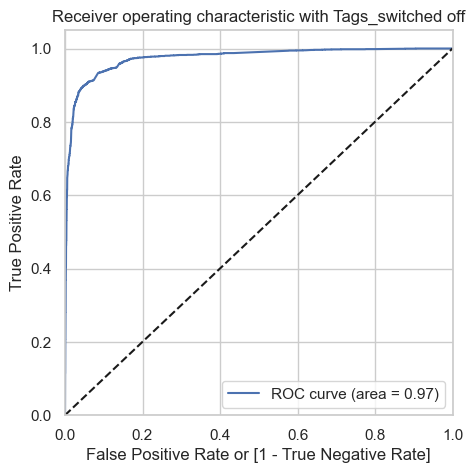

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,'with Tags_switched off')

<b>Prediction by removing Tags_switched off

In [143]:
X_train.drop('Tags_switched off',axis=1,inplace=True)

In [144]:
#fitting the model with predictor 'Tags_switched off'
model_without_tag = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res_without_tag=model_without_tag.fit()

In [145]:
# predicting the probabilities on the train set
y_train_pred = res_without_tag.predict(sm.add_constant(X_train))
y_train_pred[:10]

41      0.125552
5655    0.985914
3100    0.048062
7978    0.996141
2389    0.808237
6343    0.398290
7607    0.026123
3899    0.031318
542     0.004703
5582    0.217529
dtype: float64

In [146]:
# Reshaping y_train_pred into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12555155, 0.98591414, 0.04806194, 0.99614072, 0.80823743,
       0.39829011, 0.02612294, 0.03131752, 0.00470272, 0.21752872])

In [147]:
#creating new dataframe with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.125552
1,1,0.985914
2,0,0.048062
3,1,0.996141
4,1,0.808237


In [148]:
#adding new column if probability > 0.5 as 1 or else 0
y_train_pred_final['Prediction'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prediction
0,0,0.125552,0
1,1,0.985914,1
2,0,0.048062,0
3,1,0.996141,1
4,1,0.808237,1


In [149]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction )
print(confusion)

[[3826  155]
 [ 285 2202]]


In [150]:
#Accuracy of th emodel
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction))

0.9319727891156463


In [151]:
#calculating sensitivity and specificity

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



sens = TP/(TP+FN)       # Calculating the 'sensitivity'
spec = TN/(TN+FP)       # Calculating the 'specificity'
print('Sensitivity :',sens)
print('Specificity :',spec)

Sensitivity : 0.8854041013268998
Specificity : 0.9610650590303944


In [152]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

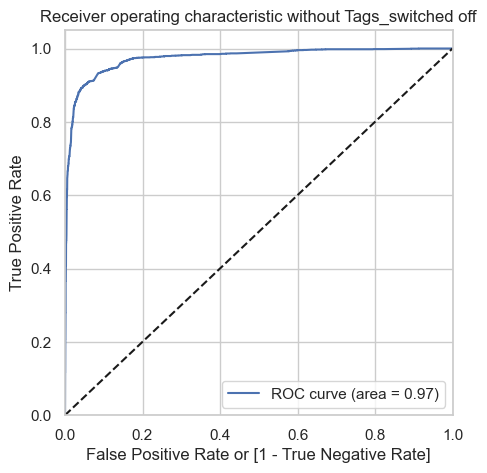

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,'without Tags_switched off')

After seeing the results of with Tags_switched off and without, the area and ROC curve did not change and similarly, the accuracy , sensitivity and specificity also not changed significantly. Hence, the model without Tags_switched off can be considered as the final model as it will simple and efficient with less number of predictors.

#### Final Model

In [156]:
#final model
final_model=sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
final_res=final_model.fit()

In [157]:
final_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1216.8
Date:                Tue, 19 Nov 2024   Deviance:                       2433.7
Time:                        20:56:56   Pearson chi2:                 8.09e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6156
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -7.6717      0.262    -29.333      0.000      -8.184      -7.159
Total Time Spent on Website                  3.7789      0.227     16.615      0.000       3.333       4.225
Lead Source_Welingak Website                 4.1420      1.020      4.060      0.000       2.142       6.142
Last Activity_SMS Sent                       2.0003      0.117     17.057      0.000       1.770       2.230
Tags_Busy                                    3.0626      0.285     10.739      0.000       2.504       3.622
Tags_Closed by Horizzon                      9.9729      1.034      9.647      0.000       7.947      11.999
Tags_Lost to EINS                            8.9915      0.651     13.814      0.000       7.716      10.267
Tags_Not Specified                           4.2400      0.217     19.580      0.000       3.816       4.664
Tags_Ringing                                -0.8653      0.298     -2.906      0.004      -1.449      -0.282
Tags_Will revert after reading the email     6.9782      0.250     27.947      0.000       6.489       7.468
Occupation_Student                           2.1037      0.428      4.921      0.000       1.266       2.942
Occupation_Unemployed                        2.6050      0.142     18.317      0.000       2.326       2.884
Occupation_Working Professional              2.8702      0.346      8.292      0.000       2.192       3.549
============================================================================================================
"""

In [158]:
# predicting the probabilities on the train set
y_train_pred = final_res.predict(sm.add_constant(X_train))
y_train_pred[:10]

41      0.125552
5655    0.985914
3100    0.048062
7978    0.996141
2389    0.808237
6343    0.398290
7607    0.026123
3899    0.031318
542     0.004703
5582    0.217529
dtype: float64

In [159]:
# Reshaping y_train_pred into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12555155, 0.98591414, 0.04806194, 0.99614072, 0.80823743,
       0.39829011, 0.02612294, 0.03131752, 0.00470272, 0.21752872])

In [160]:
#creating new dataframe with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.125552
1,1,0.985914
2,0,0.048062
3,1,0.996141
4,1,0.808237


In [161]:
#adding new column if probability > 0.5 as 1 or else 0
y_train_pred_final['Prediction'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prediction
0,0,0.125552,0
1,1,0.985914,1
2,0,0.048062,0
3,1,0.996141,1
4,1,0.808237,1


#### Optimal Cut-off

In [163]:
# creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.125552,0,1,1,0,0,0,0,0,0,0,0
1,1,0.985914,1,1,1,1,1,1,1,1,1,1,1
2,0,0.048062,0,1,0,0,0,0,0,0,0,0,0
3,1,0.996141,1,1,1,1,1,1,1,1,1,1,1
4,1,0.808237,1,1,1,1,1,1,1,1,1,1,0


In [164]:
#Obtain the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accu','sens','spec'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob      accu      sens      spec
0.0   0.0  0.384508  1.000000  0.000000
0.1   0.1  0.879870  0.973864  0.821150
0.2   0.2  0.899196  0.947326  0.869128
0.3   0.3  0.921150  0.932449  0.914092
0.4   0.4  0.930427  0.899075  0.950013
0.5   0.5  0.931973  0.885404  0.961065
0.6   0.6  0.929499  0.867712  0.968098
0.7   0.7  0.925634  0.847608  0.974378
0.8   0.8  0.911410  0.800563  0.980658
0.9   0.9  0.881725  0.711299  0.988194


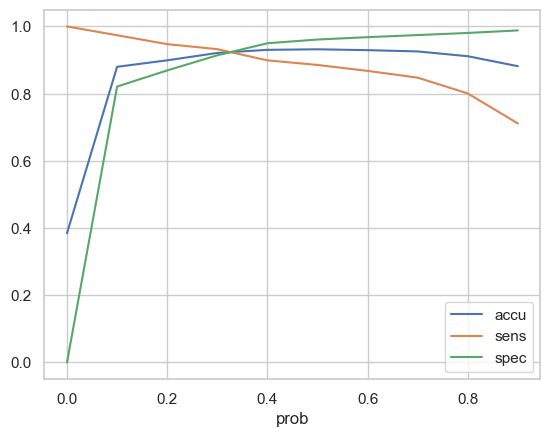

In [165]:
#plotting accuracy, sensitivity and specificity
cutoff_df.plot.line(x='prob', y=['accu','sens','spec'])
plt.show()

From the above chart at around <b>0.37</b> we get the optimal values of the three metrics.

In [167]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.125552,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.985914,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.048062,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.996141,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.808237,1,1,1,1,1,1,1,1,1,1,0,1


In [168]:
#Accuracy
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction))

Accuracy : 0.9285714285714286


In [169]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction )
confusion2

array([[3760,  221],
       [ 241, 2246]], dtype=int64)

In [170]:
#Sensitivity & Specificity
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print('Sensitivity :',TP/(TP+FN))
print('Specficity :',TN/(TN+FP))

Sensitivity : 0.9030960997185364
Specficity : 0.9444863099723687


### Predictions on Test Set

In [172]:
X_test=X_test[X_train.columns]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
6515,0.030370,0,0,0,0,0,0,0,0,0,1,0
9117,0.000000,0,0,0,0,0,0,0,0,0,1,0
1664,0.139085,0,0,0,0,0,0,1,0,0,1,0
9131,0.237236,0,0,0,0,0,0,1,0,0,1,0
3600,0.037412,0,1,0,0,0,1,0,0,0,0,0


In [173]:
# Make predictions on the test set 
y_test_pred = final_res.predict(sm.add_constant(X_test))

In [174]:
y_test_pred[:10]

6515    0.007020
9117    0.006264
1664    0.004467
9131    0.006461
3600    0.215835
8926    0.006410
1637    0.871188
545     0.010411
4313    0.177016
3652    0.871188
dtype: float64

In [175]:
#creating a test prediction data frame showing actual and predicted probability
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.reset_index(drop=True, inplace=True)

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.007020
1,0,0.006264
2,0,0.004467
3,0,0.006461
4,0,0.215835


In [176]:
# Make predictions on the test set at optimal cut-off

y_pred_final['final_prediction'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [177]:
y_pred_final.head()

,Converted,Conversion_Prob,final_prediction
0,0,0.007020,0
1,0,0.006264,0
2,0,0.004467,0
3,0,0.006461,0
4,0,0.215835,0


In [178]:
#Accuracy on Test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_prediction)

0.9217171717171717

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_prediction )
confusion2

array([[1593,  105],
       [ 112,  962]], dtype=int64)

In [180]:
#Sensitivity & Specificity on Test set
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print('Sensitivity :',TP/(TP+FN))
print('Specficity :',TN/(TN+FP))

Sensitivity : 0.8957169459962756
Specficity : 0.9381625441696113


### Building model with Precision-Recall

In [182]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction )
confusion

array([[3826,  155],
       [ 285, 2202]], dtype=int64)

In [183]:
#Precision & Recall on Train set
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('Precision :',TP/(TP+FP))
print('Recall :',TP/(TP+FN))

Precision : 0.9342384386932542
Recall : 0.8854041013268998


In [184]:
#Precision-Recall Trade-off
prec, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

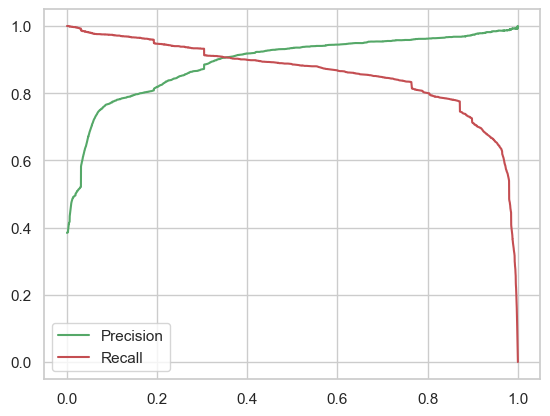

In [185]:
plt.plot(thresholds, prec[:-1], "g-",label='Precision')
plt.plot(thresholds, recall[:-1], "r-",label='Recall')
plt.legend()
plt.show()

Based on Precsion-Recall trade-off also, we are getting the optimal cut-off at around <b>0.37</b>

In [187]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.125552,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.985914,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.048062,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.996141,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.808237,1,1,1,1,1,1,1,1,1,1,0,1


In [188]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction )
confusion2

array([[3760,  221],
       [ 241, 2246]], dtype=int64)

In [189]:
#Precision and recall on trainset

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print('Precision :',TP/(TP+FP))
print('Recall :',TP/(TP+FN))

Precision : 0.9104175111471423
Recall : 0.9030960997185364


In [190]:
#Prediction on Test set
y_test_pred = final_res.predict(sm.add_constant(X_test))
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.reset_index(drop=True, inplace=True)

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.007020
1,0,0.006264
2,0,0.004467
3,0,0.006461
4,0,0.215835


In [191]:
y_pred_final['final_prediction'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_prediction
0,0,0.007020,0
1,0,0.006264,0
2,0,0.004467,0
3,0,0.006461,0
4,0,0.215835,0


In [192]:
#Accuracy on Test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_prediction)

0.9217171717171717

In [193]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_prediction )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('Precision :',TP/(TP+FP))
print('Recall :',TP/(TP+FN))

Precision : 0.901593252108716
Recall : 0.8957169459962756
